<a href="https://colab.research.google.com/github/McyRoyAl/data_processing/blob/main/data_rep%26proc_p4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import io, math
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import circulant

Reconsider the third exercise in the Theory part. We now also consider the following setting:
1.   the length of the signal is N = 64 samples, and,
2.   the random variables $M$ and $L$ follow a Gaussian distribution which satisfies the second-order statistics of the class of a parameter $c = 0.6$.

In [ ]:
N = 64
c = 0.6

## 1)

Produce a large (and sufficient) amount of realizations of the class defined above (note that each signal realization relies on realizations of K, M and L. Compute the empirical approximation of the mean signal and the autocorrelation matrix of the class.

In [ ]:
def generateSingleRealization():
  M = np.random.normal(scale = np.sqrt(c),)
  L = np.random.normal(scale = np.sqrt(N * (1 - c) / 2),)
  K = np.random.randint(0, N / 2)
  phi = np.ones(N) * M
  phi[K] = M + L
  phi[K + int(N / 2)] = M + L
  return phi

In [ ]:
def computeEmpiricalApproximation(num_realizations):
  mu = np.zeros(N)
  auto_correlation_mat = np.zeros((N, N))
  for _ in range(num_realizations):
    phi = generateSingleRealization()
    mu += phi
    auto_correlation_mat += np.outer(phi, phi)
  return mu / num_realizations, auto_correlation_mat / num_realizations

In [ ]:
# Produce Realizations
num_realizations = 10000
approximated_mu, approximated_autoCorrelation = computeEmpiricalApproximation(num_realizations)

Plot the empirical mean of the class, and show the empirically estimated autocorrelation matrix (using the function imshow in Pyplot).

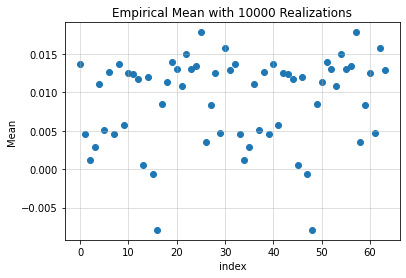

In [ ]:
plt.scatter(range(len(approximated_mu)), approximated_mu)
plt.grid(alpha = 0.5)
plt.xlabel("index")
plt.ylabel("Mean")
_ = plt.title("Empirical Mean with {} Realizations".format(num_realizations))

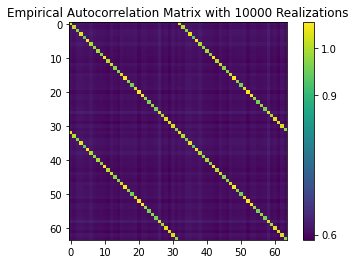

In [ ]:
#Show the Empirical Autocorrelation Matrix
plt.imshow(approximated_autoCorrelation)
ticks = [np.min(approximated_autoCorrelation),np.max(approximated_autoCorrelation)]
plt.colorbar(ticks = np.unique(approximated_autoCorrelation.round(decimals = 1)))
_ = plt.title(f"Empirical Autocorrelation Matrix with {num_realizations} Realizations")

How well do your empirical results approximate the analytical results obtained in the third question in the Theory part? What is the number of realizations needed for obtaining a good empirical approximation of the second-order statistics?

It can be seen from the emprical mean results that the $\mathbb{E}\left(\varphi\right)\approx0$, therefore it approximates very well the given $\varphi$ in the 3rd question.

The Empirical Autocorrelation Matrix is indeed (approximately ) same as the Autocorrelation matrix we computed in question 3.

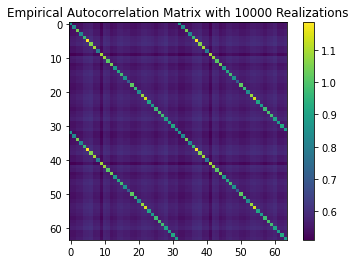

In [ ]:
approximated_mu, approximated_autoCorrelation = computeEmpiricalApproximation(1000)
plt.imshow(approximated_autoCorrelation)
ticks = [np.min(approximated_autoCorrelation),np.max(approximated_autoCorrelation)]
plt.colorbar(ticks = np.unique(approximated_autoCorrelation.round(decimals = 1)))
_ = plt.title(f"Empirical Autocorrelation Matrix with {num_realizations} Realizations")

We used 10,000 realizations in total in order to get the above results. It can be seen above that when the number of samples is significantly lower than 10,000 there is some error introduced.

## 2)

Consider a degraded signal from the above signal $φ$ by adding a white Gaussian noise having zero mean
$$φ^∗ = φ + n$$
where the autocorrelation matrix of n is defined by $R_n = σ^2_n I$. Consider $σ_n = 1$, construct numerically the Wiener filter for denoising the above defined noisy signals.

In [ ]:
def degradePhi(phi, H):
  noise = np.random.normal(0, 1, (N,1))
  phi = np.resize(phi,(N,1))
  res = (np.matmul(H,phi) + noise)
  return np.resize(res, (N))

In [ ]:
def getWienerMatrix(num_realizations, H, sigma_squared):
  """generates the wiener filter matrix, sigma = 1 H,H^t,R_n are all the identity matrix"""
  _, R = computeEmpiricalApproximation(num_realizations)
  return R * np.conjugate(H) * np.linalg.inv(H * R * np.conjugate(H) + sigma_squared * np.identity(N))

Show the filter matrix using the imshow function in Pyplot and explain the filter structure.

Text(0.5, 1.0, 'The Wiener Filter Matrix')

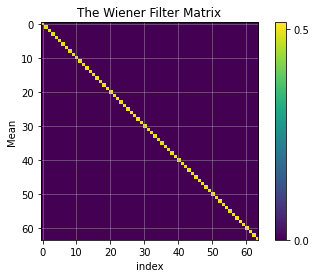

In [ ]:
W = getWienerMatrix(num_realizations, np.identity(N), sigma_squared=1)
clean_phi = generateSingleRealization()
plt.grid(alpha = 0.5)
plt.xlabel("index")
plt.ylabel("Mean")
plt.title("Empirical Mean with {} Realizations".format(num_realizations))

plt.imshow(W)
plt.colorbar(ticks = np.unique(W.round(decimals = 1)))
plt.title('The Wiener Filter Matrix')

It's equal to $\frac{1}{2}I$.

Produce a large (and sufficient) amount of realizations of the class defined above, each should be degraded by a (different) realization of the noise vector defined above. Note that the clean signal should be kept for the purpose of computing the MSE of the denoised signal. However, the denoising task should be applied with respect to the noisy signal only. Use the Wiener filter constructed above to denoise the realizations of the noisy signals by plotting several examples of denoised signals with respect to their clean and noisy versions.

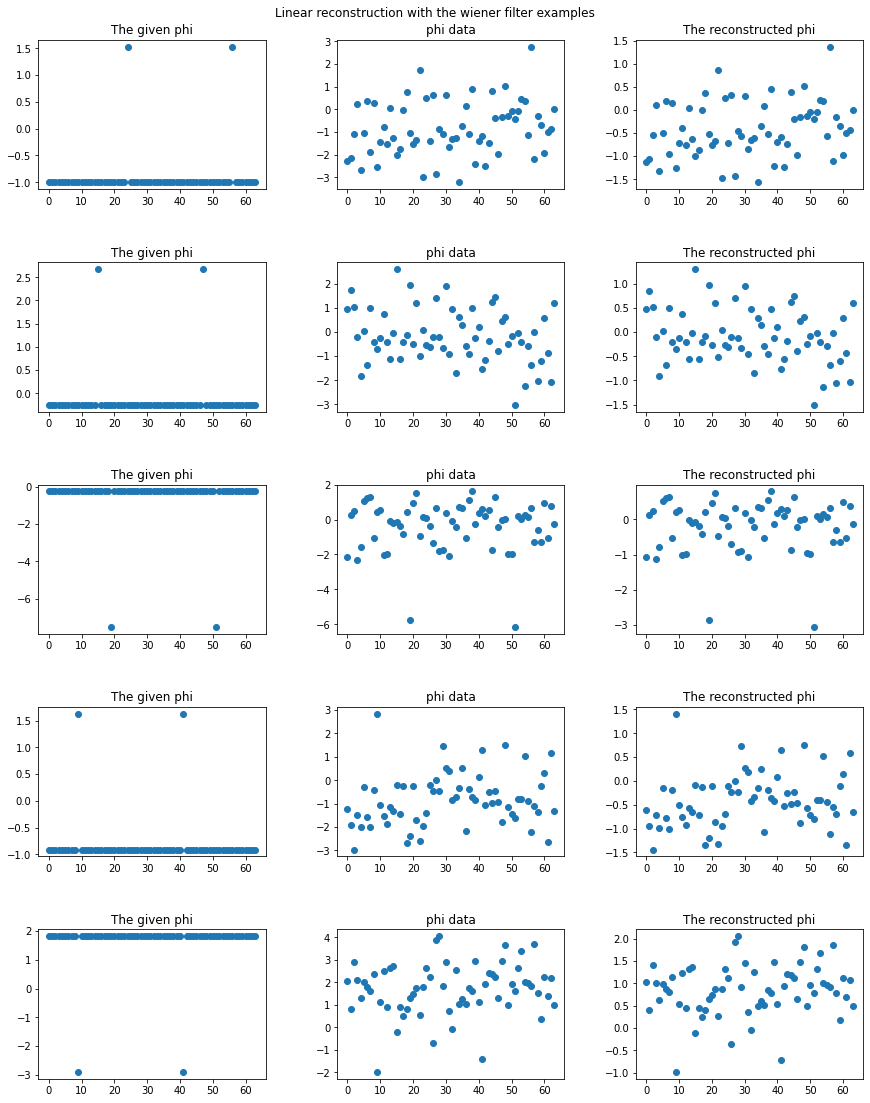

In [ ]:
figure, axis = plt.subplots(5, 3, figsize = (13, 16),)
total_error = 0
for i in range(0,num_realizations):
  phi = generateSingleRealization()  #get a phi signal
  phi_star = degradePhi(phi, np.identity(N))
  reconstructed_phi = np.matmul(W, phi_star)  #reconstruct phi with the wiener filter matrix
  reconstructed_phi = np.resize(reconstructed_phi, (N))
  # calculate the MSE of the current reconstruction
  total_error += np.sum(np.power(2, phi - phi_star)) / N
  if i < 5:
    axis[i, 0].scatter(range(len(phi)), phi)
    axis[i, 0].set_title('The given phi')
    axis[i, 1].scatter(range(len(phi_star)), phi_star)
    axis[i, 1].set_title('phi data')
    axis[i, 2].scatter(range(len(reconstructed_phi)), reconstructed_phi)
    axis[i, 2].set_title('The reconstructed phi')
figure.suptitle('Linear reconstruction with the wiener filter examples')
figure.tight_layout(pad = 4.0)


For each denoised realization, compute the MSE with respect to the clean version of the same realization. Average the MSE for all the realizations and write this number. This is the empirical approximation of the expected MSE of denoising using the Wiener filter.

In [ ]:
print(f"MSE of denoising using the Wiener filter with {num_realizations} Realizations: {total_error / num_realizations}")

MSE of denoising using the Wiener filter with 10000 Realizations: 1.2710782950300945


## 3)


Consider now that our random signals $φ$, as defined in exercise 3, are not only degraded with an additive random white noise but also undergo a linear degradation operator as defined in exercise 1. That is:
$$φ∗ = Hφ + n$$
where the $j$-th component of $Hφ$ is:
$$−\frac{1}{12} φ_{j−2[M]} + \frac{4}{3} φ_{j−1[M]} − \frac{5}{2} φ_{j[M]} + \frac{4}{3} φ_{j+1[M]} −\frac{1}{12} φ_{j+2[M]}$$
(indices are written with the modulo operation), and $n$ is defined as in the previous question. Do the same as in the previous question with this new problem.

In [ ]:
def H(n):
  h = np.zeros(n)
  h[0] = - 5 / 2
  h[-1] = h[1] = 4 / 3
  h[-2] = h[2] = - 1 / 12
  return circulant(h)

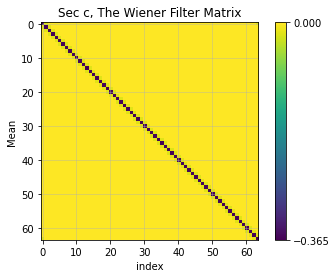

In [ ]:
W = getWienerMatrix(num_realizations, H(N), sigma_squared=1)
plt.grid(alpha = 0.5)
plt.xlabel("index")
plt.ylabel("Mean")
plt.title("Empirical Mean with {} Realizations".format(num_realizations))

plt.imshow(W)
plt.colorbar(ticks = [np.min(W), np.max(W)])# np.unique(W.round(decimals = 1)))
_ = plt.title('Sec c, The Wiener Filter Matrix')

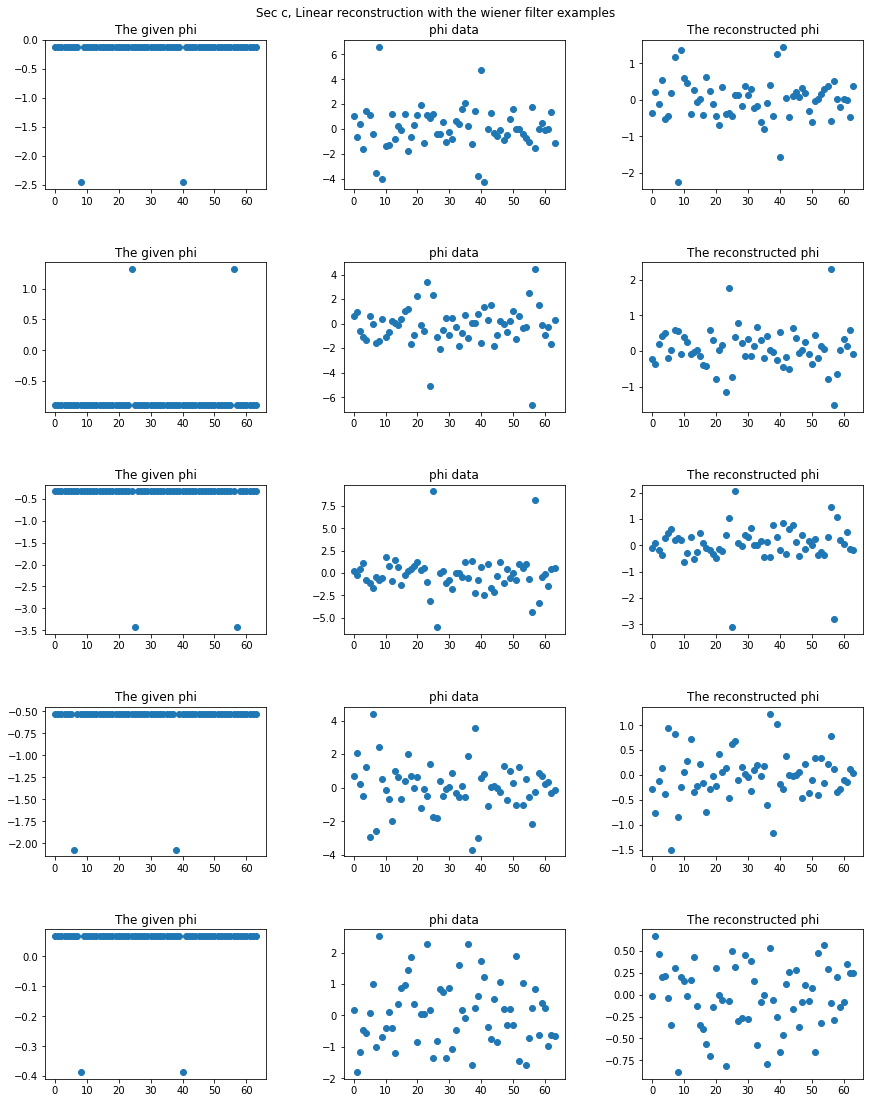

In [ ]:
figure, axis = plt.subplots(5, 3, figsize = (13, 16),)
total_error = 0
for i in range(0,num_realizations):
  phi = generateSingleRealization()  #get a phi signal
  phi_star = degradePhi(phi,  H(N))
  reconstructed_phi = np.resize(np.matmul(W, phi_star), (N))  #reconstruct phi with the wiener filter matrix
  # calculate the MSE of the current reconstruction
  total_error += np.sum(np.power(2, phi - phi_star)) / N
  if i < 5:
    axis[i, 0].scatter(range(len(phi)), phi)
    axis[i, 0].set_title('The given phi')
    axis[i, 1].scatter(range(len(phi_star)), phi_star)
    axis[i, 1].set_title('phi data')
    axis[i, 2].scatter(range(len(reconstructed_phi)), reconstructed_phi)
    axis[i, 2].set_title('The reconstructed phi')
figure.suptitle('Sec c, Linear reconstruction with the wiener filter examples')
figure.tight_layout(pad = 4.0)

In [ ]:
print(f"MSE of denoising using the Wiener filter with {num_realizations} Realizations: {total_error / num_realizations}")

MSE of denoising using the Wiener filter with 10000 Realizations: 248226991.08403373


## 4)

Repeat the above questions by considering the new noise variance $σ^2_n = 5$. What are the differences in the obtained results?

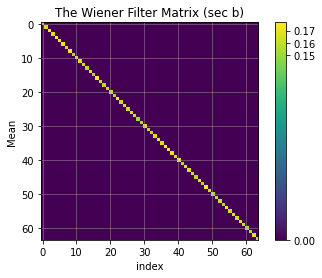

In [ ]:
W = getWienerMatrix(num_realizations, np.identity(N), sigma_squared=5)
clean_phi = generateSingleRealization()
plt.grid(alpha = 0.5)
plt.xlabel("index")
plt.ylabel("Mean")
plt.title("Empirical Mean with {} Realizations".format(num_realizations))

plt.imshow(W)
plt.colorbar(ticks = np.unique(W.round(decimals = 2)))
_ = plt.title('The Wiener Filter Matrix (sec b)')

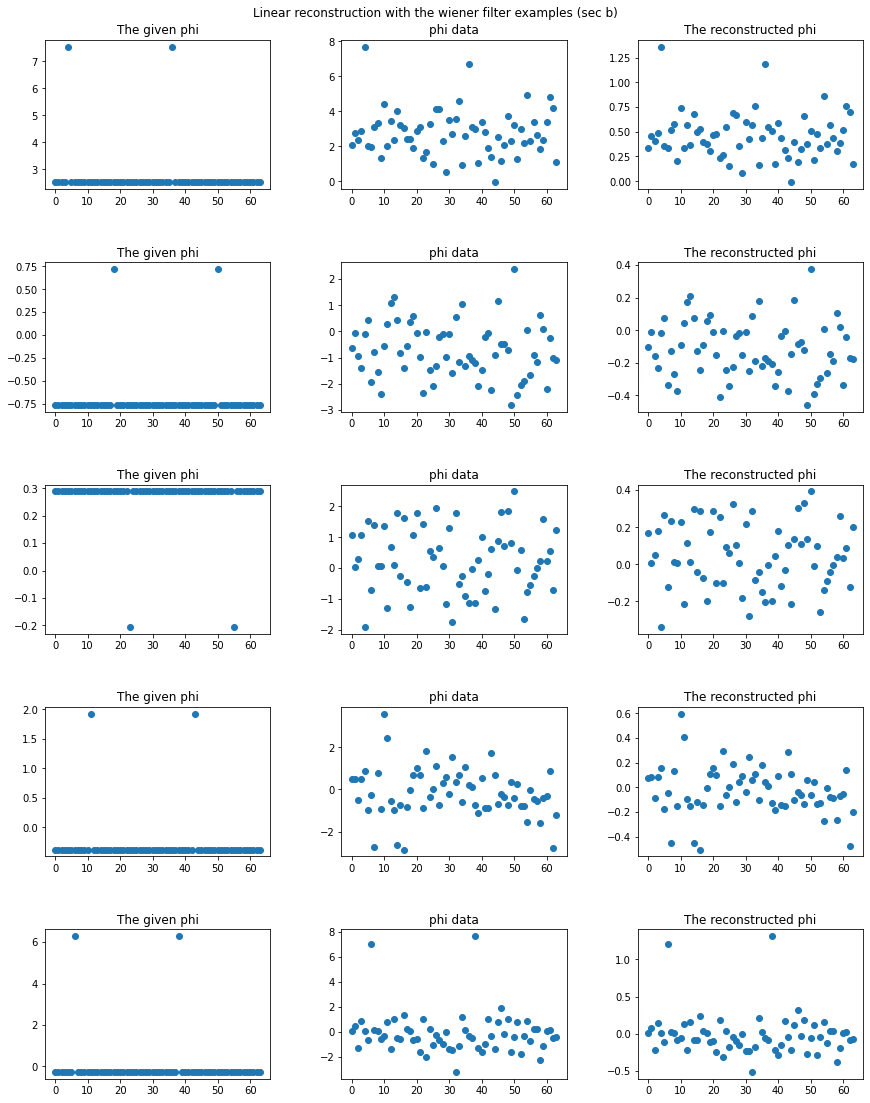

In [ ]:
figure, axis = plt.subplots(5, 3, figsize = (13, 16),)
total_error = 0
for i in range(0,num_realizations):
  phi = generateSingleRealization()  #get a phi signal
  phi_star = degradePhi(phi, np.identity(N))
  reconstructed_phi = np.matmul(W, phi_star)  #reconstruct phi with the wiener filter matrix
  reconstructed_phi = np.resize(reconstructed_phi, (N))
  # calculate the MSE of the current reconstruction
  total_error += np.sum(np.power(2, phi - phi_star)) / N
  if i < 5:
    axis[i, 0].scatter(range(len(phi)), phi)
    axis[i, 0].set_title('The given phi')
    axis[i, 1].scatter(range(len(phi_star)), phi_star)
    axis[i, 1].set_title('phi data')
    axis[i, 2].scatter(range(len(reconstructed_phi)), reconstructed_phi)
    axis[i, 2].set_title('The reconstructed phi')
figure.suptitle('Linear reconstruction with the wiener filter examples (sec b)')
figure.tight_layout(pad = 4.0)

In [ ]:
print(f"MSE of denoising using the Wiener filter with {num_realizations} Realizations: {total_error / num_realizations} (sec b)")

MSE of denoising using the Wiener filter with 10000 Realizations: 1.2714763755912895 (sec b)


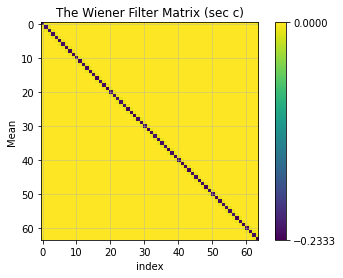

In [ ]:
W = getWienerMatrix(num_realizations, H(N), sigma_squared=5)

plt.grid(alpha = 0.5)
plt.xlabel("index")
plt.ylabel("Mean")
plt.title("Empirical Mean with {} Realizations".format(num_realizations))

plt.imshow(W)
#print(W.min())
plt.colorbar(ticks =[np.min(W), np.max(W)])#//ticks = np.unique(W.round(decimals = 3)))
_ = plt.title('The Wiener Filter Matrix (sec c)')

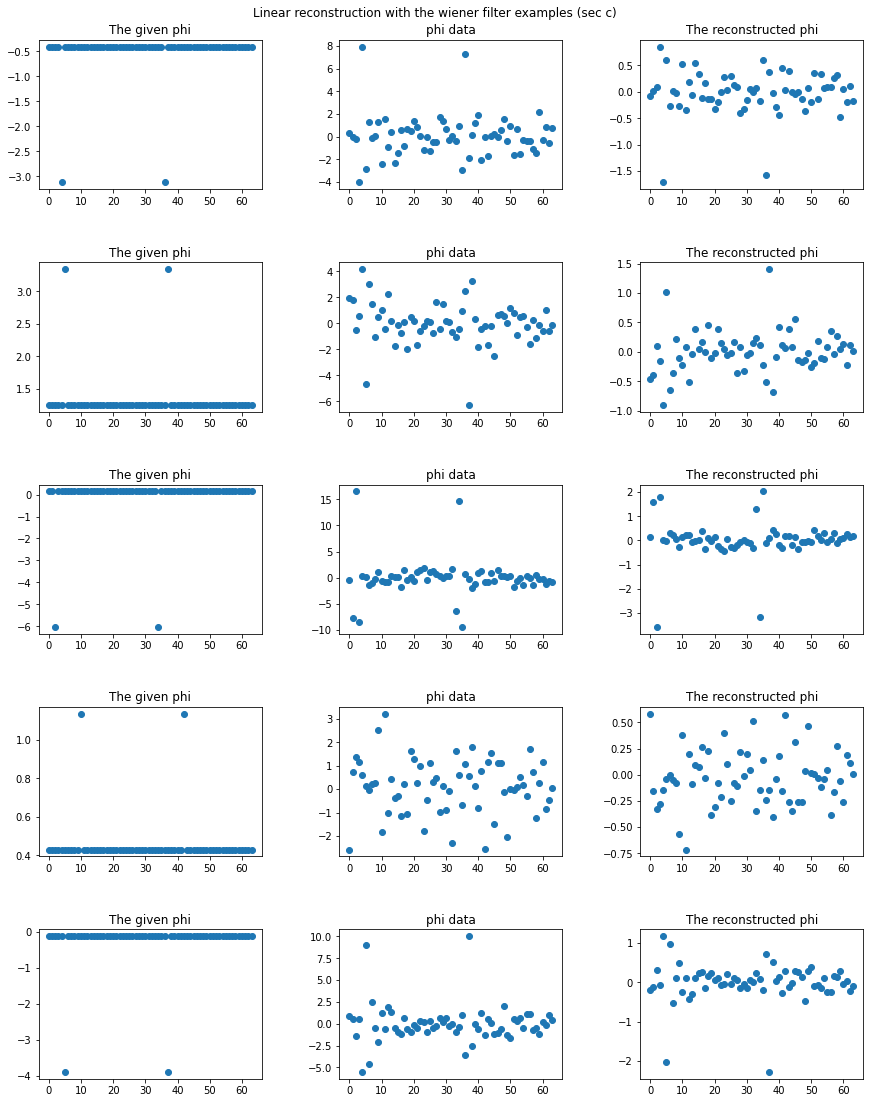

In [ ]:
figure, axis = plt.subplots(5, 3, figsize = (13, 16),)
total_error = 0
for i in range(0,num_realizations):
  phi = generateSingleRealization()  #get a phi signal
  phi_star = degradePhi(phi, H(N))
  reconstructed_phi = np.matmul(W, phi_star)  #reconstruct phi with the wiener filter matrix
  reconstructed_phi = np.resize(reconstructed_phi, (N))
  # calculate the MSE of the current reconstruction
  total_error += np.sum(np.power(2, phi - phi_star)) / N
  if i < 5:
    axis[i, 0].scatter(range(len(phi)), phi)
    axis[i, 0].set_title('The given phi')
    axis[i, 1].scatter(range(len(phi_star)), phi_star)
    axis[i, 1].set_title('phi data')
    axis[i, 2].scatter(range(len(reconstructed_phi)), reconstructed_phi)
    axis[i, 2].set_title('The reconstructed phi')
figure.suptitle('Linear reconstruction with the wiener filter examples (sec c)')
figure.tight_layout(pad = 4.0)

In [ ]:
print(f"MSE of denoising using the Wiener filter with {num_realizations} Realizations: {total_error / num_realizations} (sec c)")

MSE of denoising using the Wiener filter with 10000 Realizations: 3280910573.847578 (sec c)


On average the results in this section $\sigma^2 = 5$ are smaller than that from the previous section $\sigma^2 = 1$.

## 5)



Compute $H^{\dagger}$ the pseudo-inverse filter of $H$. Plot the results of the products $H^{\dagger} H$ and $H H^{\dagger}$ using imshow (Pyplot). Comment on the results.

In [ ]:
def dft_matrix(n):
  i, j = np.mgrid[:n, :n]
  return np.power(np.ones((n, n)) * np.exp(-2 * np.pi * complex(0, 1) / n), np.multiply(i, j)) / np.sqrt(n)

In [ ]:
def pseudo_inv(M):
  L = (dft_matrix(M.shape[0]) @ M @ dft_matrix(M.shape[0]).conjugate()).round(12)
  return np.vectorize(lambda x: complex(1, 0) / x if x != complex(0, 0) else complex(0, 0))(L)

In [ ]:
def array_to_image(array, resize = None):
  """Utility function for printing an array as an image."""
  image = Image.fromarray(np.clip(array * 256, 1, 255).astype(np.uint8))
  return image.resize((resize, resize), resample=0) if resize else image

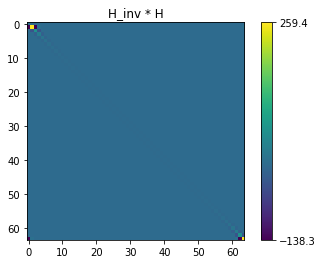

In [ ]:
A = np.real(pseudo_inv(H(N)) @ H(N))
plt.imshow(A)
plt.colorbar(ticks =[np.min(A), np.max(A)])
_ = plt.title('H_inv * H')

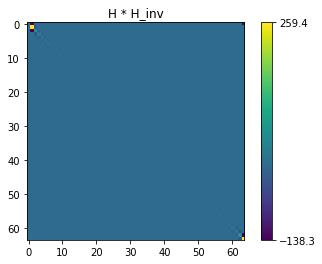

In [ ]:
A = np.real(H(N) @ pseudo_inv(H(N)))
plt.imshow(A)
plt.colorbar(ticks =[np.min(A), np.max(A)])
_ = plt.title('H * H_inv')

They appear to be very similar to each other. Extreme values appear only near the top and bottom corners of the matrix near the main diagonal.

Can you find two handcrafted signals $\phi_{1}$ and $\phi_{2}$ such that $\left\|\phi_{1}-\phi_{2}\right\|_{2} \geq 256$ satisfying $H^{\dagger} \phi_{1}=H^{\dagger} \phi_{2}$ ? If yes, explain how you chose these two signals. If no, explain why.

In [ ]:
phi_1 = np.zeros((N, 1)); phi_1[0] = 256
phi_2 = np.zeros((N, 1))

print(f"|𝜙_1 - 𝜙_2|^2 = {np.linalg.norm(phi_1 - phi_2)}")
print(f"|H†𝜙_1 - H†𝜙_2|^2 = {np.linalg.norm(pseudo_inv(H(N)) @ phi_1 - pseudo_inv(H(N)) @ phi_2)}")

|𝜙_1 - 𝜙_2|^2 = 256.0
|H†𝜙_1 - H†𝜙_2|^2 = 0.0


The only zero eigenvalue is that for the eigenvector of all ones, which when we take the DFT corresponds with a vector containing all zeros except a one in the first element. Hence, we can take any two vectors (zero vector for simplicity) and modify the first element without affecting the pseudo-inverse transforms.

In the report, provide $\left\|\phi_{1}-\phi_{2}\right\|_{2}$, $\left\|H^{\dagger} \phi_{1}-H^{\dagger} \phi_{2}\right\|_{2}$, plot $\phi_{1}, \phi_{2}, \phi_{1}-\phi_{2}, H^{\dagger} \phi_{1}, H^{\dagger} \phi_{2}$, and $H^{\dagger} \phi_{1}-H^{\dagger} \phi_{2}$.

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'pseudo_inv(H(N)) * phi_1 - pseudo_inv(H(N)) * phi_2) plot')

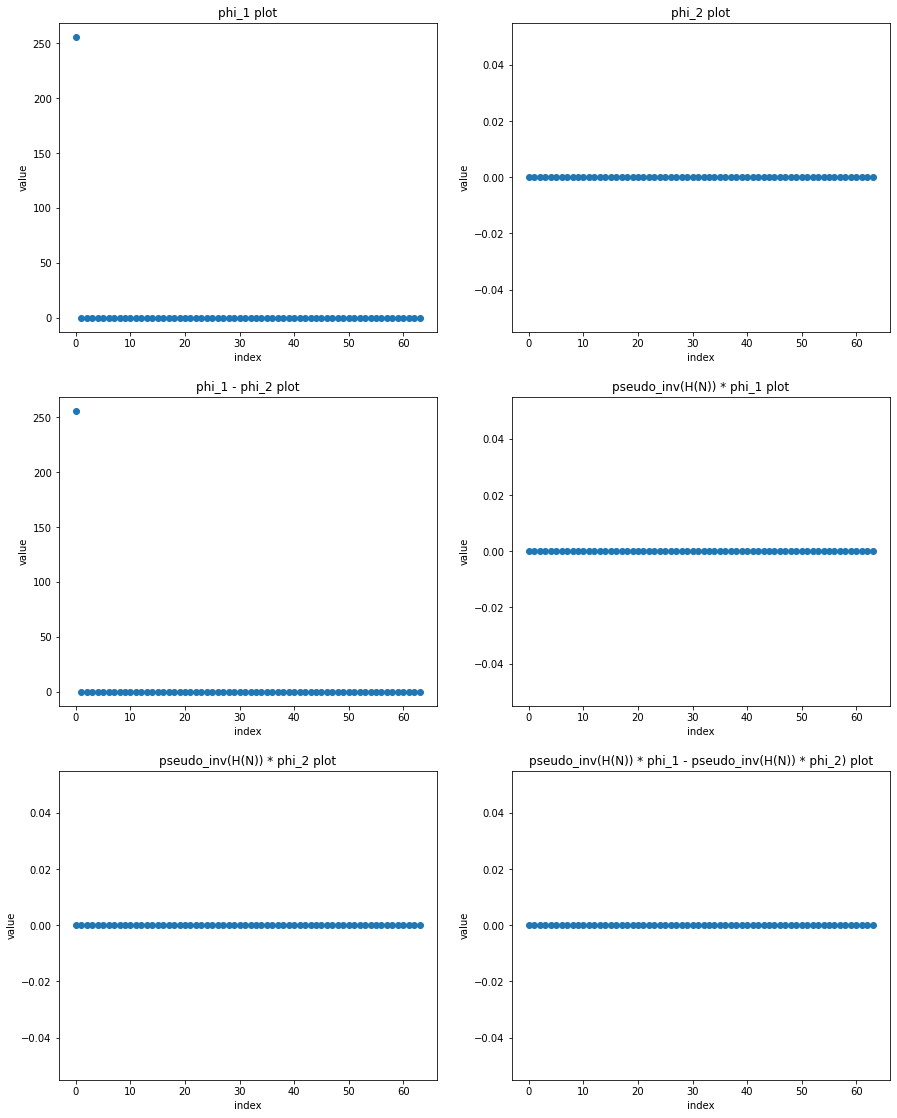

In [ ]:
figure, axis = plt.subplots(3, 2, figsize = (13, 16),)
for i in range(3):
  for j in range(2):
    axis[i][j].set_xlabel('index')
    axis[i][j].set_ylabel('value')
figure.tight_layout(pad = 3.0)

# phi_1
axis[0, 0].scatter(range(len(phi_1)), phi_1)
axis[0, 0].set_title('phi_1 plot')

# phi_2
axis[0, 1].scatter(range(len(phi_2)), phi_2)
axis[0, 1].set_title('phi_2 plot')

# phi_1 - phi_2
axis[1, 0].scatter(range(len(phi_2)), phi_1 - phi_2)
axis[1, 0].set_title('phi_1 - phi_2 plot')

# pseudo_inv(H(N)) @ phi_1
axis[1, 1].scatter(range(len(phi_1)), pseudo_inv(H(N)) @ phi_1)
axis[1, 1].set_title('pseudo_inv(H(N)) * phi_1 plot')

# pseudo_inv(H(N)) @ phi_2
axis[2, 0].scatter(range(len(phi_2)), pseudo_inv(H(N)) @ phi_2)
axis[2, 0].set_title('pseudo_inv(H(N)) * phi_2 plot')

# pseudo_inv(H(N)) @ phi_1 - pseudo_inv(H(N)) @ phi_2)
axis[2, 1].scatter(range(len(phi_2)),pseudo_inv(H(N)) @ phi_1 - pseudo_inv(H(N)) @ phi_2)
axis[2, 1].set_title('pseudo_inv(H(N)) * phi_1 - pseudo_inv(H(N)) * phi_2) plot')
